In [1]:
%load_ext autoreload
%autoreload 2

In [77]:
## Code based from the work made here https://github.com/madagra/basic-pinn/blob/main/burgers_equation_1d.py
# Runs with Python 3.8.8
from typing import Callable

import matplotlib.pyplot as plt
import numpy as np
from numpy.random import random
import torch
from torch import nn, tensor
import time as t
import ipywidgets as widgets
from ipywidgets import interact
# from functools import partial
import Fall_2022_Burgers_Equation_functions as impl
import interactive_utils as iUtils
from DictX import *

dct = GlobDct()
dct.device = "cuda" if torch.cuda.is_available() else "cpu"

In [180]:
# Driver
dct.x_domain = [-1., 1.];
dct.n_x = 100
dct.t_domain = [0.0, 1.];
dct.n_t = 100
dct.x_np = np.linspace(dct.x_domain[0], dct.x_domain[1], dct.n_x, dtype=np.float32)
dct.t_np = np.linspace(dct.t_domain[0], dct.t_domain[1], dct.n_t, dtype=np.float32)

#iUtils defines a function that makes plots with widgets
iUtils.draw_plot_locations()

interactive(children=(IntSlider(value=80, description='n', max=141, min=20, step=20), IntSlider(value=6, descr…

In [182]:
# Train model
dct.max_epochs = 100  # 5_000 works
dct.lr = 0.025
dct.U_nn_trained = impl.wrap_train_model(**dct)

Epoch: 0 - Loss: 0.534525


In [183]:
dct.n_x, dct.n_t

(100, 100)

In [196]:
dct.n_x_test = 100
dct.n_t_test = 100
dct.x_domain_test = [-1., 1.];
dct.t_domain_test = [0, 1.];
impl.evaluate_model(**dct)

Done!


n_x_test=100
Done!
u2d:  (100, 100)


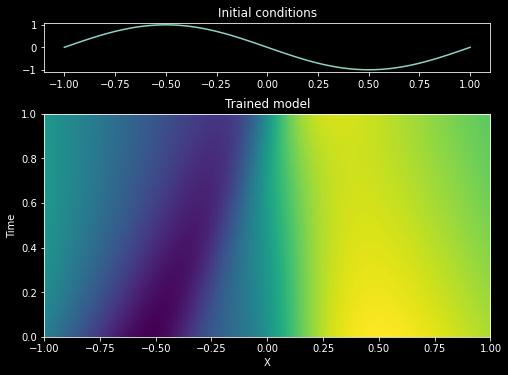

Done!


In [198]:
# Sets dct.u2d
impl.plot_evaluation(**dct)

nx,step:  100 20
u2d.shape=(100, 100)
u2d.shape=(100, 100)
u2d.shape=(100, 100)
u2d.shape=(100, 100)
u2d.shape=(100, 100)
Done!


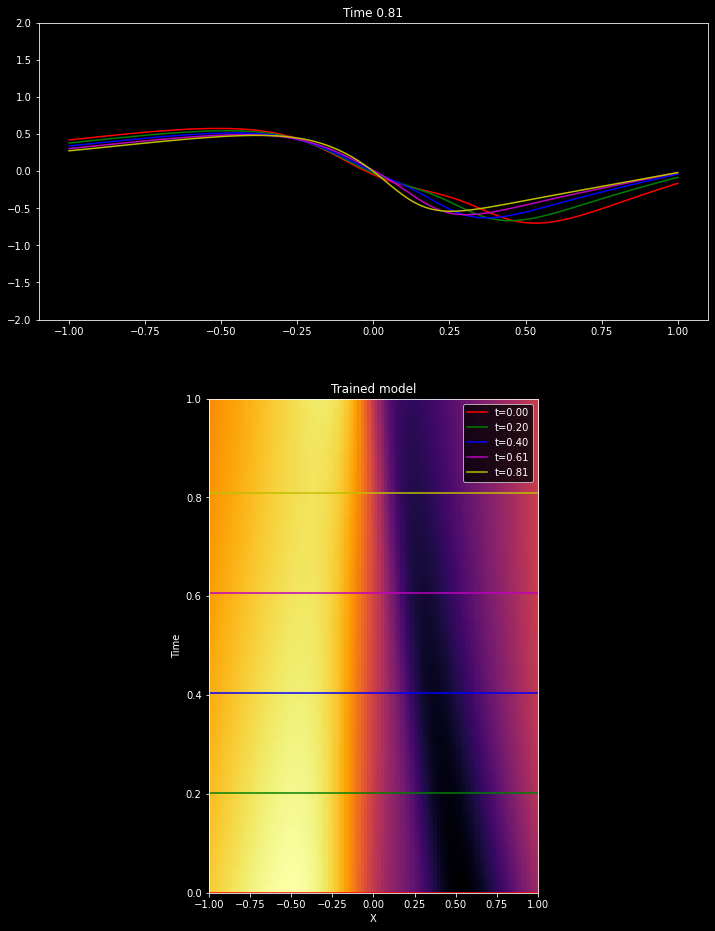

In [202]:
# impl.plot_intermediate_values(**dct)
iUtils.draw_plot_intermediate_values()

# Why is the red line (t=0), moving away frm u=0 at the boundaries. WRONG! 
# Perhaps a sign of non-converence, since the BC is not imposed. 

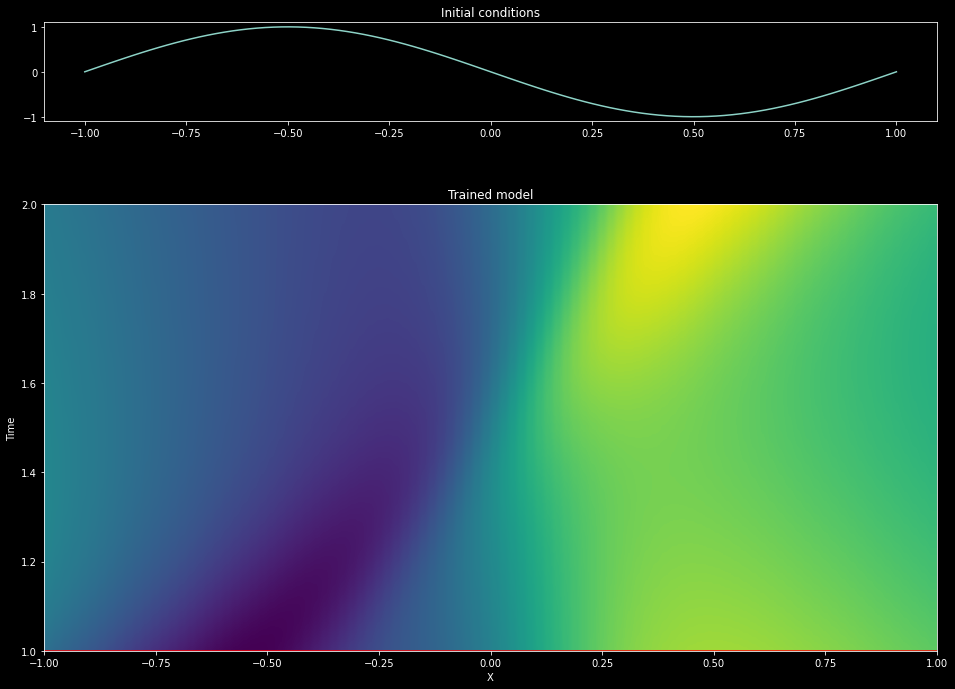

Done!


In [204]:
## Evaluating outside the trained domain
## --------- Evaluation ---------------
dct.n_x_test = 100
dct.n_t_test = 100
dct.x_domain_test = [-1., 1.];
dct.t_domain_test = [1., 2.]

iUtils.draw_plot_extrapolated_solution()
#===================================================================================================